<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220627_ML13_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plot(), scatter(), imshow(), ...
from matplotlib import image # image 모듈 import : imsave(), imread(), ...
from sklearn import datasets # scikit-learn에서 제공되는 예제 데이터 셋을 사용하기 위해서

# Python에서 이미지 다루기

In [ ]:
china = datasets.load_sample_image('china.jpg')

In [ ]:
type(china) # 'numpy.ndarray'

numpy.ndarray

In [ ]:
china.shape

(427, 640, 3)

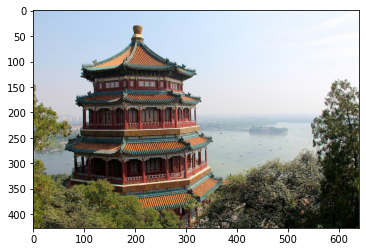

In [ ]:
plt.imshow(china) # (height, width, rgb/rgba)
# plt.axis('off') # 이미지만 보기
plt.show()

* 흑백 이미지인 경우, 이미지 배열의 shape : (height, width)
* 컬러 이미지인 경우
    * 불투명한 경우, 이미지 배열의 shape : (height, width, 3)
    * 투명도가 있는 경우, 이미지 배열의 shape : (height, width, 4)

* 이미지 배열의 숫자 스케일
    * 0 ~ 255 정수 스케일
    * 0 ~ 1 실수 스케일

In [ ]:
china[:, :, 0] # RGB 중에서 'R'의 크기

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

In [ ]:
# 0 ~ 255 스케일을 0.0 ~ 1.0 스케일로 변환
china_scaled = china / 255
china_scaled[:, :, 0]

array([[0.68235294, 0.68235294, 0.68235294, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.6745098 , 0.67843137, 0.67843137, ..., 0.98431373, 0.98431373,
        0.98431373],
       [0.68235294, 0.68235294, 0.68235294, ..., 0.98823529, 0.98823529,
        0.98823529],
       ...,
       [0.34509804, 0.57647059, 0.47843137, ..., 0.15294118, 0.03137255,
        0.02352941],
       [0.47843137, 0.50588235, 0.4627451 , ..., 0.03529412, 0.03529412,
        0.0627451 ],
       [0.45490196, 0.40784314, 0.42352941, ..., 0.16862745, 0.05098039,
        0.05882353]])

* matplotlib.image.imsave(fname, arr) : 파일 fname에 이미지 배열 arr을 이미지 형식(jpg, png, bmp, ...)으로 저장하는 함수.
* matplotlib.image.imread(fname) : 이미지 파일 fname에서 이미지를 읽고 배열을 리턴.

In [ ]:
image.imsave('china_copy.jpg', china_scaled) # Colab 세션에 저장

In [ ]:
img = image.imread('china_copy.jpg')
img

array([[[173, 200, 229],
        [173, 200, 229],
        [173, 200, 229],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[173, 200, 229],
        [173, 200, 229],
        [174, 201, 230],
        ...,
        [250, 251, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[173, 200, 229],
        [174, 201, 230],
        [174, 201, 230],
        ...,
        [251, 252, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 87,  82,   0],
        [138, 132,  54],
        [132, 126,  50],
        ...,
        [ 44,  45,  40],
        [  3,   4,   0],
        [ 11,  12,   6]],

       [[115, 108,  30],
        [132, 124,  49],
        [114, 108,  34],
        ...,
        [ 26,  27,  22],
        [  6,   7,   1],
        [ 22,  23,  17]],

       [[122, 112,  40],
        [112, 102,  31],
        [102,  94,  22],
        ...,
        [ 31,  32,  27],
        [ 11,  12,   6],
        [ 19,  20,  14]]

이미지 자르기 - 배열 slicing

In [ ]:
img.shape

(427, 640, 3)

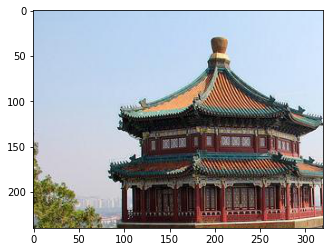

In [ ]:
cropped = img[:240, :320, :]
plt.imshow(cropped)
plt.show()

# MNIST datasets

70,000개의 숫자(0 ~ 9) 손글씨 흑백 이미지(28×28)가 numpy 배열로 저장된 데이터 셋.

In [ ]:
mnist = datasets.fetch_openml('mnist_784')

In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
X = mnist['data'].values.copy()
y = mnist['target'].values.astype('int').copy()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
X.shape # (이미지 샘플 개수, 이미지 세로x가로)

(70000, 784)

In [ ]:
y.shape

(70000,)

# MNIST 데이터 시각화

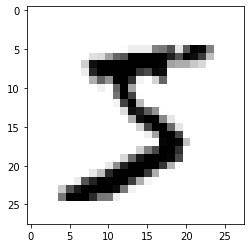

In [ ]:
# 첫 번째 샘플을 시각화
image_0 = X[0].reshape((28, 28))
plt.imshow(image_0, cmap=plt.cm.binary)
# cmap='binary' : white(0) ~ black(255 or 1.0)
# cmap='gray' : black(0) ~ white(255 or 1.0)
plt.show()

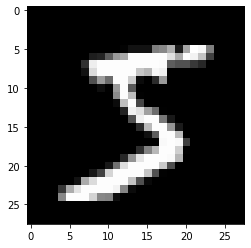

In [ ]:
plt.imshow(image_0, cmap='gray')
plt.show()

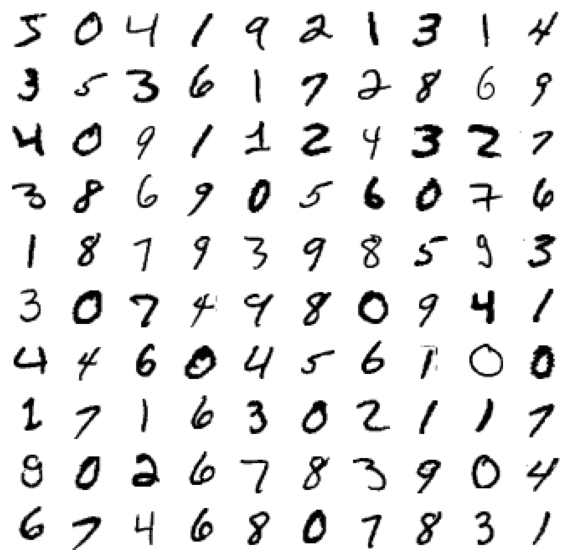

In [ ]:
# 이미지 100개를 10x10 subplot에 시각화
fig, ax = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):     # subplot의 row index를 0~9까지 반복
    for j in range(10): # subplot의 column index를 0~9까지 반복
        img = X[i * 10 + j].reshape((28, 28))
        ax[i, j].imshow(img, cmap='binary')
        ax[i, j].axis('off')

plt.show()

In [ ]:
y[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])

# train/test split

* `train_test_split()` 함수 이용
* MNIST 데이터 셋은 랜덤하게 섞여있기 때문에 앞에서 60,000개는 훈련 셋으로, 나머지 10,000개는 테스트 셋으로 사용.

In [ ]:
train_size = 60_000
X_tr, X_te = X[:train_size], X[train_size:]

In [ ]:
y_tr, y_te = y[:train_size], y[train_size:]

# 모델 선택, 훈련, 평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_tr, y_tr)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
# 훈련 셋 평가 점수(정확도)
knn.score(X_tr, y_tr)

0.9819166666666667

In [ ]:
tr_pred = knn.predict(X_tr)

In [ ]:
confusion_matrix(y_tr, tr_pred)

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

# 틀린 예측 분석

In [ ]:
# 예측값과 실젯값이 다른 샘플들
X_wrong = X_tr[tr_pred != y_tr]
X_wrong.shape

(1085, 784)

In [ ]:
# 예측값과 실젯값이 다른 레이블
y_wrong = y_tr[tr_pred != y_tr]
y_wrong.shape

(1085,)

In [ ]:
wrong_pred = tr_pred[y_tr != tr_pred]

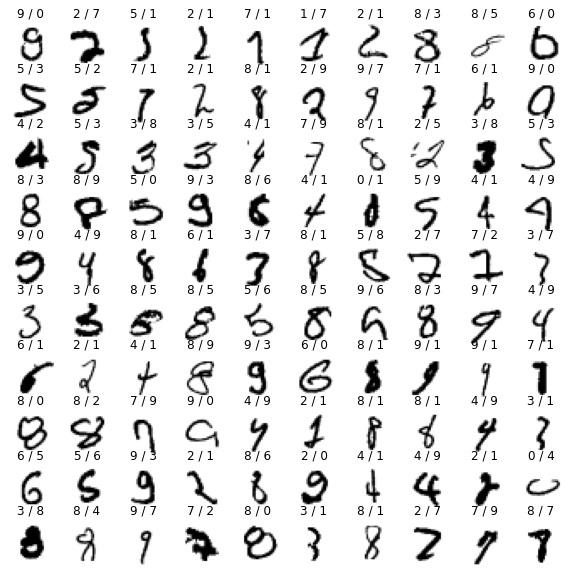

In [ ]:
# 예측값이 틀린 샘플들 중 100개 시각화
fig, ax = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):     # subplot의 row index를 0~9까지 반복
    for j in range(10): # subplot의 column index를 0~9까지 반복
        img = X_wrong[i * 10 + j].reshape((28, 28))
        ax[i, j].imshow(img, cmap='binary')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'{y_wrong[i * 10 + j]} / {wrong_pred[i * 10 + j]}') # 실젯값 / 틀린 예측값

plt.show()

## confusion matrix 시각화

In [ ]:
conf_mat = confusion_matrix(y_tr, tr_pred)
conf_mat

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

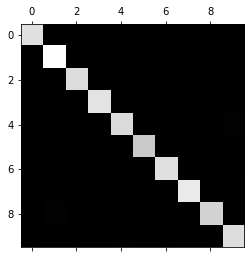

In [ ]:
plt.matshow(conf_mat, cmap='gray') # 2차원 배열을 시각화
# cmap='gray' : black(0) ~ white(1.0 or 255)
plt.show()

위에서 시각화한 confusion matrix의 문제점 :
* 정확도가 98%이므로 대각선 이외의 셀들은 상대적으로 숫자가 너무 작음.
    * 거의 검은색으로만 보임.
    * 대각선을 0으로 대체.
        * 더 많이 틀린 부분이 더 밝게 표현됨.



In [ ]:
np.fill_diagonal(conf_mat, 0)
conf_mat

array([[ 0,  4,  2,  0,  1,  4, 14,  2,  1,  2],
       [ 1,  0,  7,  0,  0,  0,  1,  9,  1,  2],
       [24, 36,  0, 10,  7,  4,  6, 41,  6,  3],
       [ 2, 12, 26,  0,  0, 34,  2, 21, 17, 16],
       [ 3, 39,  1,  1,  0,  0,  6,  5,  2, 61],
       [13,  5,  3, 35,  5,  0, 38,  3,  3, 14],
       [11,  9,  0,  0,  4, 12,  0,  0,  0,  0],
       [ 1, 46, 10,  2,  7,  0,  0,  0,  0, 34],
       [15, 59, 10, 40, 20, 51, 14, 11,  0, 40],
       [10,  6,  5, 22, 34,  9,  2, 39,  7,  0]])

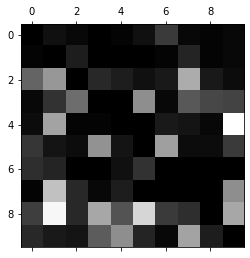

In [ ]:
plt.matshow(conf_mat, cmap='gray')
plt.show()

* 샘플들이 클래스(0, 1, 2, ... ,9)마다 고르게 분포하지 않음.
    * 각 클래스에서 틀린 비율 시각화하는 것이 좋음.
    * 행(row)별로 샘플 개수 합계를 계산해서 각 셀의 값을 나눠줌.
* 대각선의 숫자들은 0으로 대체.

In [ ]:
conf_mat = confusion_matrix(y_tr, tr_pred)
conf_mat_normalized = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
conf_mat_normalized

array([[9.94934999e-01, 6.75333446e-04, 3.37666723e-04, 0.00000000e+00,
        1.68833361e-04, 6.75333446e-04, 2.36366706e-03, 3.37666723e-04,
        1.68833361e-04, 3.37666723e-04],
       [1.48323939e-04, 9.96885197e-01, 1.03826758e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.48323939e-04, 1.33491546e-03,
        1.48323939e-04, 2.96647879e-04],
       [4.02819738e-03, 6.04229607e-03, 9.77005707e-01, 1.67841558e-03,
        1.17489090e-03, 6.71366230e-04, 1.00704935e-03, 6.88150386e-03,
        1.00704935e-03, 5.03524673e-04],
       [3.26211059e-04, 1.95726635e-03, 4.24074376e-03, 9.78796281e-01,
        0.00000000e+00, 5.54558800e-03, 3.26211059e-04, 3.42521611e-03,
        2.77279400e-03, 2.60968847e-03],
       [5.13522766e-04, 6.67579596e-03, 1.71174255e-04, 1.71174255e-04,
        9.79801438e-01, 0.00000000e+00, 1.02704553e-03, 8.55871277e-04,
        3.42348511e-04, 1.04416296e-02],
       [2.39808153e-03, 9.22339052e-04, 5.53403431e-04, 6.45637336e-03,
   

In [ ]:
np.fill_diagonal(conf_mat_normalized, 0)
conf_mat_normalized

array([[0.        , 0.00067533, 0.00033767, 0.        , 0.00016883,
        0.00067533, 0.00236367, 0.00033767, 0.00016883, 0.00033767],
       [0.00014832, 0.        , 0.00103827, 0.        , 0.        ,
        0.        , 0.00014832, 0.00133492, 0.00014832, 0.00029665],
       [0.0040282 , 0.0060423 , 0.        , 0.00167842, 0.00117489,
        0.00067137, 0.00100705, 0.0068815 , 0.00100705, 0.00050352],
       [0.00032621, 0.00195727, 0.00424074, 0.        , 0.        ,
        0.00554559, 0.00032621, 0.00342522, 0.00277279, 0.00260969],
       [0.00051352, 0.0066758 , 0.00017117, 0.00017117, 0.        ,
        0.        , 0.00102705, 0.00085587, 0.00034235, 0.01044163],
       [0.00239808, 0.00092234, 0.0005534 , 0.00645637, 0.00092234,
        0.        , 0.00700978, 0.0005534 , 0.0005534 , 0.00258255],
       [0.00185874, 0.00152078, 0.        , 0.        , 0.0006759 ,
        0.00202771, 0.        , 0.        , 0.        , 0.        ],
       [0.00015962, 0.00734238, 0.0015961

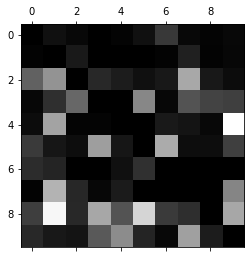

In [ ]:
plt.matshow(conf_mat_normalized, cmap='gray')
plt.show()

# LogisticRegression

In [ ]:
logistic = LogisticRegression(n_jobs=-1)

In [ ]:
logistic.fit(X_tr, y_tr)

LogisticRegression(n_jobs=-1)

In [ ]:
logistic.score(X_tr, y_tr)

0.9339166666666666

In [ ]:
tr_pred = logistic.predict(X_tr)
confusion_matrix(tr_pred, y_tr)

array([[5764,    1,   28,   17,   13,   57,   34,   11,   27,   21],
       [   0, 6584,   47,   23,   22,   18,    9,   20,   93,   22],
       [  15,   32, 5445,  118,   23,   40,   40,   58,   55,   14],
       [   9,   19,   89, 5582,    9,  161,    0,   28,  122,   70],
       [  14,    6,   61,    6, 5491,   48,   35,   42,   19,  129],
       [  36,   20,   20,  162,    8, 4793,   58,    8,  136,   33],
       [  33,    3,   56,   14,   48,   82, 5713,    4,   36,    3],
       [  10,   10,   51,   50,   15,   15,    4, 5896,   18,  138],
       [  38,   55,  140,  119,   42,  160,   21,   20, 5293,   45],
       [   4,   12,   21,   40,  171,   47,    4,  178,   52, 5474]])

In [ ]:
def wrong_plot(X_tr, y_tr, tr_pred):

    X_wrong = X_tr[tr_pred != y_tr]
    y_wrong = y_tr[tr_pred != y_tr]

    wrong_pred = tr_pred[y_tr != tr_pred]

    fig, ax = plt.subplots(10, 10, figsize = (10, 10))

    for i in range(10):     # subplot의 row index를 0~9까지 반복
        for j in range(10): # subplot의 column index를 0~9까지 반복
            img = X_wrong[i * 10 + j].reshape((28, 28))
            ax[i, j].imshow(img, cmap='binary')
            ax[i, j].axis('off')
            ax[i, j].set_title(f'{y_wrong[i * 10 + j]} / {wrong_pred[i * 10 + j]}') # 실젯값 / 틀린 예측값

    plt.show()

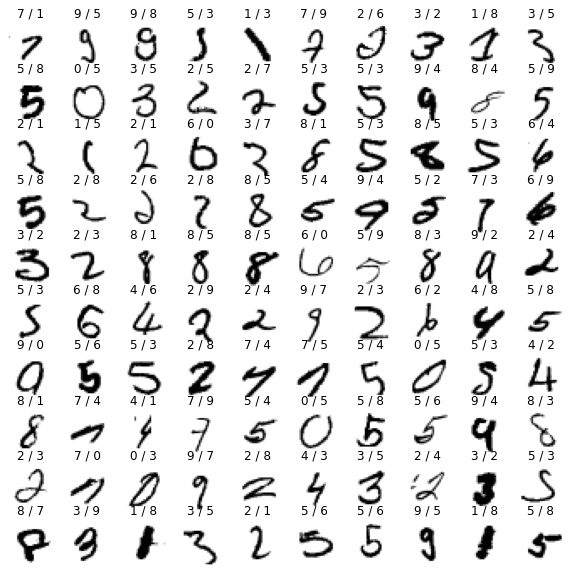

In [ ]:
wrong_plot(X_tr, y_tr, tr_pred)

In [ ]:
def conf_mat_plot(y_tr, tr_pred):
    conf_mat = confusion_matrix(y_tr, tr_pred)
    conf_mat_normalized = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
    np.fill_diagonal(conf_mat_normalized, 0)

    plt.matshow(conf_mat_normalized, cmap='gray')
    plt.show()

In [ ]:
conf_mat = confusion_matrix(y_tr, tr_pred)

In [ ]:
conf_mat_normalized = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
conf_mat_normalized

array([[9.73155496e-01, 0.00000000e+00, 2.53250042e-03, 1.51950025e-03,
        2.36366706e-03, 6.07800101e-03, 5.57150093e-03, 1.68833361e-03,
        6.41566774e-03, 6.75333446e-04],
       [1.48323939e-04, 9.76564818e-01, 4.74636606e-03, 2.81815485e-03,
        8.89943637e-04, 2.96647879e-03, 4.44971818e-04, 1.48323939e-03,
        8.15781667e-03, 1.77988727e-03],
       [4.69956361e-03, 7.88855321e-03, 9.13897281e-01, 1.49378986e-02,
        1.02383350e-02, 3.35683115e-03, 9.39912722e-03, 8.55991944e-03,
        2.34978181e-02, 3.52467271e-03],
       [2.77279400e-03, 3.75142717e-03, 1.92464525e-02, 9.10455064e-01,
        9.78633176e-04, 2.64230957e-02, 2.28347741e-03, 8.15527646e-03,
        1.94095580e-02, 6.52422117e-03],
       [2.22526532e-03, 3.76583362e-03, 3.93700787e-03, 1.54056830e-03,
        9.39917836e-01, 1.36939404e-03, 8.21636426e-03, 2.56761383e-03,
        7.18931873e-03, 2.92707977e-02],
       [1.05146652e-02, 3.32042059e-03, 7.37871241e-03, 2.96993175e-02,
   

In [ ]:
np.fill_diagonal(conf_mat_normalized, 0)
conf_mat_normalized

array([[0.        , 0.        , 0.0025325 , 0.0015195 , 0.00236367,
        0.006078  , 0.0055715 , 0.00168833, 0.00641567, 0.00067533],
       [0.00014832, 0.        , 0.00474637, 0.00281815, 0.00088994,
        0.00296648, 0.00044497, 0.00148324, 0.00815782, 0.00177989],
       [0.00469956, 0.00788855, 0.        , 0.0149379 , 0.01023834,
        0.00335683, 0.00939913, 0.00855992, 0.02349782, 0.00352467],
       [0.00277279, 0.00375143, 0.01924645, 0.        , 0.00097863,
        0.0264231 , 0.00228348, 0.00815528, 0.01940956, 0.00652422],
       [0.00222527, 0.00376583, 0.00393701, 0.00154057, 0.        ,
        0.00136939, 0.00821636, 0.00256761, 0.00718932, 0.0292708 ],
       [0.01051467, 0.00332042, 0.00737871, 0.02969932, 0.00885445,
        0.        , 0.01512636, 0.00276702, 0.02951485, 0.00866999],
       [0.00574518, 0.00152078, 0.00675904, 0.        , 0.00591416,
        0.00980061, 0.        , 0.0006759 , 0.0035485 , 0.0006759 ],
       [0.00175579, 0.00319234, 0.0092577

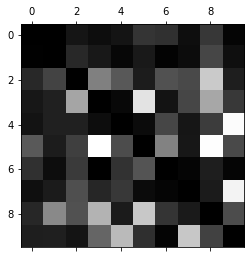

In [ ]:
plt.matshow(conf_mat_normalized, cmap='gray')
plt.show()

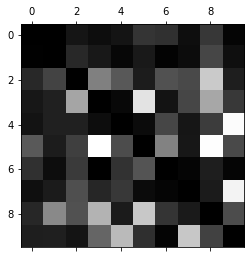

In [ ]:
conf_mat_plot(y_tr, tr_pred)

# SGDClassifier

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd.fit(X_tr, y_tr)

SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
sgd.score(X_tr, y_tr)

0.8807666666666667

In [ ]:
tr_pred = sgd.predict(X_tr)
confusion_matrix(tr_pred, y_tr)

array([[5363,    1,    5,    3,   14,   17,   15,    3,   13,   10],
       [   0, 6482,   58,    6,   23,    4,    4,    9,   39,    7],
       [  40,   16, 4903,   65,   32,   31,   61,   49,   28,   20],
       [ 131,   74,  292, 5637,   74,  422,   44,  100,  223,  209],
       [   6,    1,   37,    3, 4650,   32,   25,   22,    6,   46],
       [  98,   10,   30,  120,   50, 4318,   91,   19,  214,   50],
       [  16,    8,   31,    5,   18,   72, 5390,    2,   13,    0],
       [   7,    8,   48,   19,   40,   31,    3, 5671,   12,  162],
       [ 261,  136,  537,  223,  361,  429,  281,  122, 5249,  262],
       [   1,    6,   17,   50,  580,   65,    4,  268,   54, 5183]])

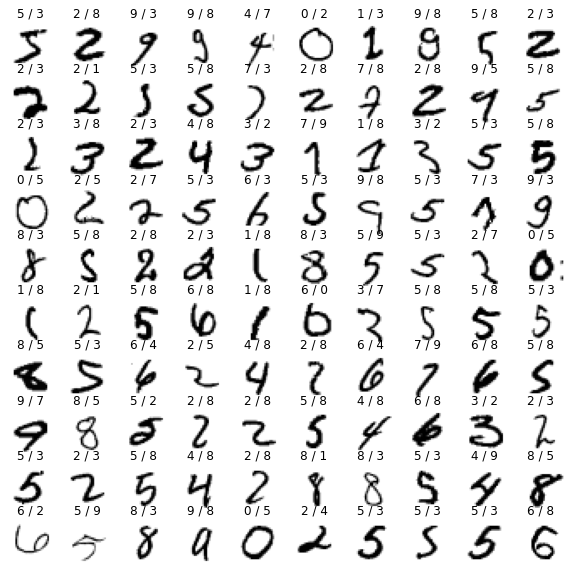

In [ ]:
wrong_plot(X_tr, y_tr, tr_pred)

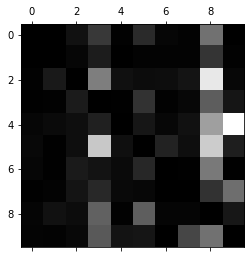

In [ ]:
conf_mat_plot(y_tr, tr_pred)